In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/amongnikol/belajaraDataScienceJCOp/refs/heads/main/course2-regresiDanKlasifikasiPemula-supervisedLearning/data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

# Quick Exploratory Data Analysis(Quick EDA)

In [3]:
df.drop(columns=['Age','Cabin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.7+ KB


In [4]:
embarked_modus = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_modus)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.7+ KB


# persiapan data

In [5]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [6]:
# input/feature
x = df.drop(columns='Survived')
# target/label
y = df.Survived

# encode
x = pd.get_dummies(x, columns=['Pclass', 'Sex', 'Embarked'])
x.head()


,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,False,False,True,False,True,False,False,True
2,1,0,71.2833,True,False,False,True,False,True,False,False
3,0,0,7.9250,False,False,True,True,False,False,False,True
4,1,0,53.1000,True,False,False,True,False,False,False,True
5,0,0,8.0500,False,False,True,False,True,False,False,True


In [7]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

# intro scikit-learn

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.score(x, y)

0.8787878787878788

# concept 1: dataset splitting

In [10]:
from sklearn.model_selection import train_test_split
# input/feature
x = df.drop(columns='Survived')
# target/label
y = df.Survived

# encode
x = pd.get_dummies(x, columns=['Pclass', 'Sex', 'Embarked'])

In [13]:
x.shape

(891, 11)

In [12]:
# gunakan stratify= y berdasarkan target untuk classification split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

In [14]:
#  soal ujian tidak boleh terlalu sedikit
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
# kalau hasil train terlalu jomplang dengan test disebut overfit
# overfit hasilnya terlalu memaksakan dengan train
# jadi ketika dihadapkan dengan test tidak sesuai harapan
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.9101123595505618, 0.7262569832402235)

# concept 2: k-fold cross validation

In [18]:
from sklearn.model_selection import cross_val_score

# data tidak perlu di split karna dibalik layar ia akan mensplit dataset dengan melakukan beberapa skenario
# hati hati dalam menentukan skenario karna kalau terlalu banyak maka test menjadi sedikit
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, x, y, cv=5)

array([0.63687151, 0.63483146, 0.80337079, 0.73033708, 0.71348315])

In [19]:
cross_val_score(knn, x, y, cv=5).mean()

0.703778796058

# improvement melalui data: feature scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
x_train.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
693,0,0,56.4958,False,False,True,False,True,False,False,True
482,0,0,0.0000,False,True,False,False,True,False,False,True
528,0,0,221.7792,True,False,False,False,True,False,False,True
856,0,1,9.3500,False,False,True,True,False,False,False,True
802,1,1,26.2500,False,True,False,True,False,False,False,True


In [23]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [24]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
# dikasus ini menggunakan minmax scaler model tidak improve
knn.score(x_train_scaled, y_train), knn.score(x_test_scaled, y_test)

(0.8890449438202247, 0.6983240223463687)

# improvement melalui model: parameter tuning

## tuning n_neighbor tanpa scaling

In [33]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

In [34]:
train_score

[0.9101123595505618,
 0.8581460674157303,
 0.8426966292134831,
 0.827247191011236,
 0.8089887640449438,
 0.7865168539325843,
 0.7907303370786517,
 0.7794943820224719,
 0.7794943820224719,
 0.7654494382022472,
 0.7514044943820225,
 0.7556179775280899,
 0.7570224719101124,
 0.7401685393258427,
 0.7514044943820225,
 0.7443820224719101,
 0.7485955056179775,
 0.7485955056179775,
 0.7401685393258427,
 0.7570224719101124,
 0.7359550561797753,
 0.7317415730337079,
 0.7191011235955056,
 0.726123595505618,
 0.7092696629213483]

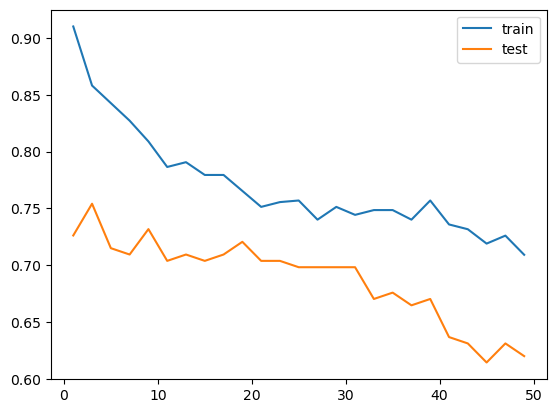

In [35]:
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

In [36]:
print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')

Max test score: 0.7541899441340782
n_neighbor: 3


## tuning n_neighbor dengan scaling

Max test score: 0.7988826815642458
n_neighbor: 29


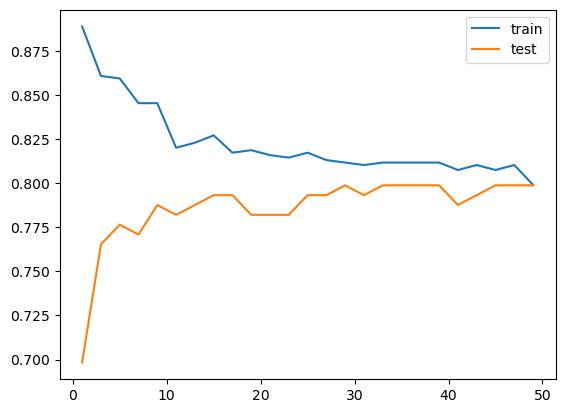

In [46]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    train_score.append(knn.score(x_train_scaled, y_train))
    test_score.append(knn.score(x_test_scaled, y_test))

plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')

## tuning n_neighbor dengan weight by distance

Max test score: 0.7988826815642458
n_neighbor: 49


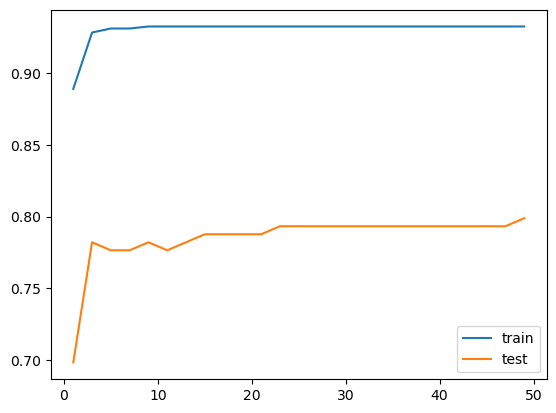

In [47]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(x_train_scaled, y_train)

    train_score.append(knn.score(x_train_scaled, y_train))
    test_score.append(knn.score(x_test_scaled, y_test))

plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')

### menggunakan manhattan distance

Max test score: 0.7932960893854749
n_neighbor: 23


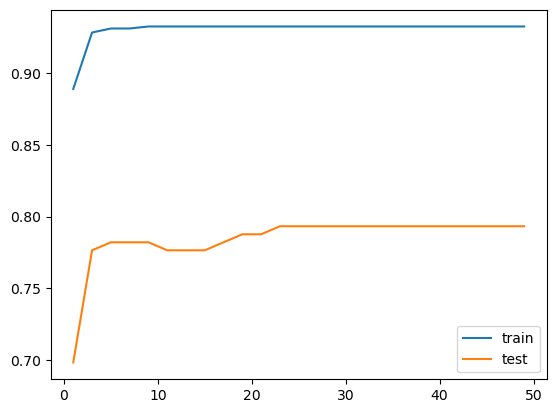

In [48]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    knn.fit(x_train_scaled, y_train)

    train_score.append(knn.score(x_train_scaled, y_train))
    test_score.append(knn.score(x_test_scaled, y_test))

plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f'Max test score: {np.max(test_score)}')
print(f'n_neighbor: {neighbor[np.argmax(test_score)]}')